### Loading the necessary Libraries

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
import xgboost as xgb
from xgboost import XGBClassifier # XGBoost algorithm
# Importing model evaluation metrics
from sklearn.metrics import recall_score # recall metric
from sklearn.metrics import roc_auc_score # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import precision_score # evaluation metric
from sklearn.ensemble import VotingClassifier

#### Loading the cleaned data

In [23]:
df_cleaned_final = pd.read_csv(r'C:\Users\TALEHOUSE\Documents\df_cleaned_final.csv')

In [24]:
df_cleaned_final.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y,PC1,PC2
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,0,-1.35089,0.681003
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,0,-1.35089,0.681003
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,0,-1.35089,0.681003
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,0,-1.35089,0.681003
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,0,-1.35089,0.681003


#### Imbalanced nature of the data set

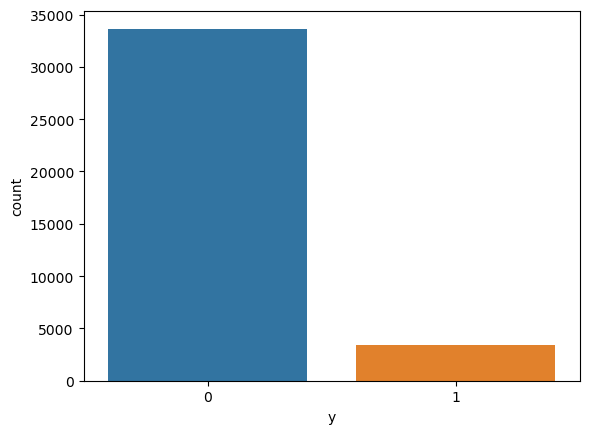

In [25]:
x = df_cleaned_final['y']
ax = sns.countplot(x=x,data= df_cleaned_final)

#### One hot coding-encoding categorical data to numerical

In [26]:
df_cleaned_finalA = pd.get_dummies(df_cleaned_final, drop_first=True)

In [27]:
df_cleaned_finalA.head()

,age,duration,campaign,previous,y,PC1,PC2,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,0,0,-1.35089,0.681003,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,0,0,-1.35089,0.681003,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,0,0,-1.35089,0.681003,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,0,0,-1.35089,0.681003,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,0,0,-1.35089,0.681003,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [28]:
df_cleaned_finalA.dtypes

age                                int64
duration                           int64
campaign                           int64
previous                           int64
y                                  int64
PC1                              float64
PC2                              float64
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
marital_married                    uint8
marital_single                     uint8
education_basic.6y                 uint8
education_basic.9y                 uint8
education_high.school              uint8
education_illiterate               uint8
education_professional.course      uint8
education_univer

In [29]:

df_cleaned_finalA.columns

Index(['age', 'duration', 'campaign', 'previous', 'y', 'PC1', 'PC2',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

#### Data Split

In [30]:
X = df_cleaned_finalA.drop('y', axis = 1).values 
y = df_cleaned_finalA['y'].values

#### Train-Test Split: Spliting the data set into traing and testing data in ratio 70/30

Addressing the imbalance data set using Smote techniques.  
Smote uses both undersampling and oversampling to balance the target class.  

In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

#### Split data set into traing and testing data in ratio 70/30 using smote

In [32]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### Fitting the smote data

In [33]:
X_train_sm, y_train_sm = sm.fit_resample(X_train_sm, y_train_sm.ravel()) 

#### Describes infomation about train and test set

In [34]:
print("Number transactions X_train dataset: ", X_train_sm.shape)
print("Number transactions y_train dataset: ", y_train_sm.shape)
print("Number transactions X_test dataset: ", X_test_sm.shape)
print("Number transactions y_test dataset: ", y_test_sm.shape)

Number transactions X_train dataset:  (47030, 42)
Number transactions y_train dataset:  (47030,)
Number transactions X_test dataset:  (11127, 42)
Number transactions y_test dataset:  (11127,)


### Modelling Stage

#### Logistic regression Classifier

In [35]:
#instantiate the model
LR = LogisticRegression()
 
#fit the model using the training data
LR.fit(X_train_sm, y_train_sm.ravel())

#use model to make predictions on test data

predictions = LR.predict(X_test_sm)
 
# print classification report
print(classification_report(y_test_sm, predictions))
print(accuracy_score(y_test_sm, predictions))
print(roc_auc_score(y_test_sm, predictions))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91     10126
           1       0.36      0.88      0.51      1001

    accuracy                           0.85     11127
   macro avg       0.67      0.86      0.71     11127
weighted avg       0.93      0.85      0.88     11127

0.8508133369281927
0.8622175770111776


C:\Users\TALEHOUSE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#### Decision Tree Classifier

In [36]:
#instantiate the model
DT = DecisionTreeClassifier(random_state=42)
 
#fit the model using the training data
DT.fit(X_train_sm, y_train_sm.ravel())

#use model to make predictions on test data 
predictions = DT.predict(X_test_sm)
 
# print classification report
print(classification_report(y_test_sm, predictions))
print(accuracy_score(y_test_sm, predictions))
print(roc_auc_score(y_test_sm, predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10126
           1       0.45      0.51      0.48      1001

    accuracy                           0.90     11127
   macro avg       0.70      0.72      0.71     11127
weighted avg       0.91      0.90      0.90     11127

0.8992540666846409
0.7240873386933034


#### Random Forest Tree Classifier

In [37]:
#instantiate the model
RF = RandomForestClassifier(random_state=42)

#fit the model using the training data
RF.fit(X_train_sm, y_train_sm.ravel())

#use model to make predictions on test data 
predictions = RF.predict(X_test_sm)
 
# print classification report
print(classification_report(y_test_sm, predictions))
print(accuracy_score(y_test_sm, predictions))
print(roc_auc_score(y_test_sm, predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     10126
           1       0.65      0.49      0.56      1001

    accuracy                           0.93     11127
   macro avg       0.80      0.73      0.76     11127
weighted avg       0.92      0.93      0.93     11127

0.929810371169228
0.730973105504016


####  K-Nearest Neighbors Classifier

In [38]:
#instantiate the model
n = 5
KNN = KNeighborsClassifier()

#fit the model using the training data
KNN.fit(X_train_sm, y_train_sm.ravel())

#use model to make predictions on test data 
predictions = KNN.predict(X_test_sm)
 
# print classification report
print(classification_report(y_test_sm, predictions))
print(accuracy_score(y_test_sm, predictions))
print(roc_auc_score(y_test_sm, predictions))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     10126
           1       0.31      0.74      0.44      1001

    accuracy                           0.83     11127
   macro avg       0.64      0.79      0.67     11127
weighted avg       0.91      0.83      0.86     11127

0.8280758515323088
0.7867078112485973


#### XGBClassifier Classifier

In [39]:
#instantiate the model
XGB = XGBClassifier(random_state=42)

#fit the model using the training data
XGB.fit(X_train_sm, y_train_sm.ravel())

#use model to make predictions on test data 
predictions = XGB.predict(X_test_sm)
 
# print classification report
print(classification_report(y_test_sm, predictions))
print(accuracy_score(y_test_sm, predictions))
print(roc_auc_score(y_test_sm, predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     10126
           1       0.64      0.53      0.58      1001

    accuracy                           0.93     11127
   macro avg       0.80      0.75      0.77     11127
weighted avg       0.93      0.93      0.93     11127

0.9308888289745664
0.7522712819473633


### Evaluation of Classifiers

In [40]:
import plotly.graph_objects as go
Classifiers =['DT','KNN','LR','RF','XGB']
fig = go.Figure(data=[
 go.Bar(name='Accuracy', x=Classifiers, y=[0.89, 0.82, 0.85, 0.92, 0.93]),
 go.Bar(name='F1 Score', x=Classifiers, y=[0.94, 0.90, 0.91, 0.96, 0.96]),
 go.Bar(name='Precision', x=Classifiers, y=[0.95, 0.97, 0.99, 0.95, 0.95]),
 go.Bar(name='Recall', x=Classifiers, y=[0.94, 0.84, 0.85, 0.97, 0.97]),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title='Evaluation Results of Classifiers on the Smote Data Set')
fig.show()

Based on the evaluation metrics,the best performing classifiers are so far DT, RF and XGB

### Ensemble Methods:

### Stacking

In [41]:
#create a dictionary of our models
estimators = [('XGB', XGBClassifier(random_state=42)), 
              ('DT', DecisionTreeClassifier(random_state=42)), 
              ('RF',RandomForestClassifier())]

In [42]:
from sklearn.ensemble import StackingClassifier
lr = LogisticRegression()
sclf = StackingClassifier(estimators=estimators, final_estimator=lr)

In [43]:
# fit model to training data
sclf.fit(X_train_sm,y_train_sm)
sclf.score(X_test_sm,y_test_sm)

0.9157904196998292

#### Evaluating metrics

In [44]:
# Evaluate Metrics
preds= sclf.predict(X_test_sm)
print(accuracy_score(y_test_sm, preds))
print(f1_score(y_test_sm, preds))
print(precision_score(y_test_sm, preds))

0.9157904196998292
0.5177560473494596
0.5339702760084926


Eventhough the emsemble methods are geared to enhance the overall performance of a model,  
In this case the stacking emsemble method did not appreciately enhance the performance of this model.  
Hence the best individual performing model amongst the rest is the XGBoost Classifier model